Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
from sqlite3 import Error

In [2]:
#Reading in data acquired in previous steps 1 and 2
van_bikes = pd.read_csv("vancouver_bikes.csv")
venues_fsq = pd.read_csv("vancouver_venues_fsq.csv")
venues_yelp = pd.read_csv("vancouver_venues_yelp.csv")

In [3]:
#Let's take a look at van_bikes summary
van_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uid           254 non-null    int64  
 1   latitude      254 non-null    float64
 2   longitude     254 non-null    float64
 3   free_bikes    254 non-null    int64  
 4   empty_slots   254 non-null    int64  
 5   station_name  254 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 12.0+ KB


In [4]:
#uid column equals city_bikes_id in venues df, so let's match their names
van_bikes.rename(columns = {"uid": "city_bikes_id"}, inplace = True)

In [5]:
#Let's take a look at venues_fsq summary
venues_fsq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11951 entries, 0 to 11950
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fsq_id            11951 non-null  object 
 1   distance_station  11951 non-null  int64  
 2   latitude          11951 non-null  float64
 3   longitude         11951 non-null  float64
 4   name              11951 non-null  object 
 5   category_name     11951 non-null  object 
 6   rating            0 non-null      float64
 7   city_bikes_id     11951 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 747.1+ KB


In [6]:
#Let's take a look at venues_yelp summary
venues_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12425 entries, 0 to 12424
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yelp_id           12425 non-null  object 
 1   name              12425 non-null  object 
 2   rating            12425 non-null  float64
 3   category_name     12425 non-null  object 
 4   distance_station  12425 non-null  float64
 5   latitude          12425 non-null  float64
 6   longitude         12425 non-null  float64
 7   city_bikes_id     12425 non-null  int64  
 8   category          12424 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 873.8+ KB


In [7]:
#Checking for duplicates in venues_yelp df
yelp_duplicates = venues_yelp.duplicated(subset = ["name", "latitude", "longitude", "city_bikes_id"])
print("Number of duplicate keys in Yelp df:", yelp_duplicates.sum())

Number of duplicate keys in Yelp df: 6


In [8]:
#Removing duplicates from venues_yelp df
venues_yelp_cleaned = venues_yelp.drop_duplicates(subset = ["name", "latitude", "longitude", "city_bikes_id"])
venues_yelp_cleaned 

,yelp_id,name,rating,category_name,distance_station,latitude,longitude,city_bikes_id,category
0,XAH2HpuUUtu7CUO26pbs4w,Saku,4.3,"[{'alias': 'japanese', 'title': 'Japanese'}]",178.845344,49.263101,-123.116675,1,japanese
1,6iOAgzJ0DRZNSKA3FSrrOg,La Taqueria Pinche Taco Shop,4.2,"[{'alias': 'mexican', 'title': 'Mexican'}]",170.590723,49.263617,-123.112593,1,mexican
2,nkDZY5xqihF3XtZMzzfqqg,Hokkaido Ramen Santouka,4.2,"[{'alias': 'noodles', 'title': 'Noodles'}, {'a...",191.044234,49.263127,-123.116892,1,noodles
3,4118Aq9LbkvUr4s719uUkA,Uma Sushi,4.3,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",152.157897,49.263805,-123.113729,1,japanese
4,F5wxgIiZE7LYQxgqhI483A,Seaport City Seafood Restaurant,4.2,"[{'alias': 'dimsum', 'title': 'Dim Sum'}, {'al...",168.615262,49.263921,-123.115152,1,dimsum
...,...,...,...,...,...,...,...,...,...
12420,RIb01mB9pEJ3yeebyHb4XA,Cioppino's Mediterranean Grill,4.2,"[{'alias': 'mediterranean', 'title': 'Mediterr...",1092.623823,49.275522,-123.121794,187,mediterranean
12421,hQoFgRJhYZn4AM5uE3c9fA,Donair Dude,3.7,"[{'alias': 'mideastern', 'title': 'Middle East...",76.317079,49.281217,-123.132758,187,mideastern
12422,VyHdjx6K9XNfjsh2_2PqFA,Thida Thai Resturant,3.3,"[{'alias': 'thai', 'title': 'Thai'}]",31.257034,49.281743,-123.133033,187,thai
12423,kDZTaeUaf78Jd25ktX8a8g,Number E Food,4.8,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...",520.019263,49.277569,-123.131018,187,sandwiches


In [9]:
#Checking for duplicates in venues_fsq df
fsq_duplicates = venues_fsq.duplicated(subset = ["name", "latitude", "longitude", "city_bikes_id"])
print("Number of duplicate keys in Foursquare df:", fsq_duplicates.sum())

Number of duplicate keys in Foursquare df: 17


In [10]:
#Removing duplicates from venues_fsq df
venues_fsq_cleaned = venues_fsq.drop_duplicates(subset = ["name", "latitude", "longitude", "city_bikes_id"])
venues_fsq_cleaned 

,fsq_id,distance_station,latitude,longitude,name,category_name,rating,city_bikes_id
0,4aec909ff964a520ccc821e3,435,49.263724,-123.108701,Milano Coffee,Coffee Shop,NaN,1
1,4aa98676f964a520105420e3,216,49.263077,-123.117243,Elysian Coffee Broadway,Coffee Shop,NaN,1
2,5a31538260d11b06bc47c475,527,49.263182,-123.107195,Modus Coffee,Café,NaN,1
3,4b1db335f964a520211424e3,97,49.263328,-123.114020,Marulilu Cafe,Café,NaN,1
4,5674aec9498e6800815c3598,556,49.257484,-123.114820,Vij's,Indian Restaurant,NaN,1
...,...,...,...,...,...,...,...,...
11946,4aa7f806f964a520524e20e3,736,49.276947,-123.126213,Two Parrots Taverna,Burger Joint,NaN,187
11947,4aa97278f964a520b25320e3,967,49.290242,-123.137571,Blenz Coffee,Coffee Shop,NaN,187
11948,4aa748faf964a5209a4c20e3,72,49.281472,-123.132602,Pumpjack Pub,Gay Bar,NaN,187
11949,4aa81ae3f964a520594f20e3,815,49.283983,-123.122190,Shabusen Yakiniku House,BBQ Joint,NaN,187


In [11]:
#Checking for duplicates in van_bikes df
bikes_duplicates = van_bikes.duplicated(subset = ["latitude", "longitude", "city_bikes_id"])
print("Number of duplicate keys in van_bikes df:", bikes_duplicates.sum())

Number of duplicate keys in van_bikes df: 0


In [12]:
#Merging both venues datasets on latitude and longitude plus city_bikes_id
venues_merged_df = pd.merge(venues_fsq_cleaned, venues_yelp_cleaned, on = ["latitude", "longitude", "city_bikes_id"], suffixes = ("_fsq", "_yelp"))
venues_merged_df

,fsq_id,distance_station_fsq,latitude,longitude,name_fsq,category_name_fsq,rating_fsq,city_bikes_id,yelp_id,name_yelp,rating_yelp,category_name_yelp,distance_station_yelp,category


In [13]:
#I wanted to join both data on longitude and latitude but it seems that there might be a precision differences between both, therefore I changed to merging on "name" and "city_bikes_id" instead
venues_merged_df = pd.merge(venues_fsq, venues_yelp, on = ["name", "city_bikes_id"], suffixes = ("_fsq", "_yelp"))
venues_merged_df.head()

,fsq_id,distance_station_fsq,latitude_fsq,longitude_fsq,name,category_name_fsq,rating_fsq,city_bikes_id,yelp_id,rating_yelp,category_name_yelp,distance_station_yelp,latitude_yelp,longitude_yelp,category
0,4b1db335f964a520211424e3,97,49.263328,-123.114020,Marulilu Cafe,Café,NaN,1,NensKn1MSVU_rm-1Y6WlFA,4.0,"[{'alias': 'cafes', 'title': 'Cafes'}]",102.329817,49.263380,-123.114150,cafes
1,588e7f618b0ebb5d010abac4,197,49.263015,-123.116994,Hokkaido Ramen Santouka,Ramen Restaurant,NaN,1,nkDZY5xqihF3XtZMzzfqqg,4.2,"[{'alias': 'noodles', 'title': 'Noodles'}, {'a...",191.044234,49.263127,-123.116892,noodles
2,4aa6f181f964a520934b20e3,993,49.261744,-123.100746,The Cascade Room,Lounge,NaN,1,7mC73EaD-pi3yyR63ZVn3A,3.9,"[{'alias': 'pubs', 'title': 'Pubs'}, {'alias':...",992.501407,49.261700,-123.100620,pubs
3,57859a88498ee75da193d5c7,936,49.263042,-123.101505,Fable Diner,Diner,NaN,1,uonaIMF0GOLC8UzKR3IaQA,3.9,"[{'alias': 'diners', 'title': 'Diners'}, {'ali...",936.803187,49.263075,-123.101982,diners
4,50982adee4b0cb1b3389815d,142,49.263035,-123.112616,Sushi California,Sushi Restaurant,NaN,1,mvCO6pRpfMB0_1GLlwgZRw,3.6,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",143.492170,49.263045,-123.112614,japanese


In [14]:
#Merging with van_bikes on city_bikes_id
bikes_venues_df = pd.merge(venues_merged_df, van_bikes, on = "city_bikes_id")
bikes_venues_df.head()

,fsq_id,distance_station_fsq,latitude_fsq,longitude_fsq,name,category_name_fsq,rating_fsq,city_bikes_id,yelp_id,rating_yelp,category_name_yelp,distance_station_yelp,latitude_yelp,longitude_yelp,category,latitude,longitude,free_bikes,empty_slots,station_name
0,4b1db335f964a520211424e3,97,49.263328,-123.114020,Marulilu Cafe,Café,NaN,1,NensKn1MSVU_rm-1Y6WlFA,4.0,"[{'alias': 'cafes', 'title': 'Cafes'}]",102.329817,49.263380,-123.114150,cafes,49.262487,-123.114397,1,32,10th & Cambie
1,588e7f618b0ebb5d010abac4,197,49.263015,-123.116994,Hokkaido Ramen Santouka,Ramen Restaurant,NaN,1,nkDZY5xqihF3XtZMzzfqqg,4.2,"[{'alias': 'noodles', 'title': 'Noodles'}, {'a...",191.044234,49.263127,-123.116892,noodles,49.262487,-123.114397,1,32,10th & Cambie
2,4aa6f181f964a520934b20e3,993,49.261744,-123.100746,The Cascade Room,Lounge,NaN,1,7mC73EaD-pi3yyR63ZVn3A,3.9,"[{'alias': 'pubs', 'title': 'Pubs'}, {'alias':...",992.501407,49.261700,-123.100620,pubs,49.262487,-123.114397,1,32,10th & Cambie
3,57859a88498ee75da193d5c7,936,49.263042,-123.101505,Fable Diner,Diner,NaN,1,uonaIMF0GOLC8UzKR3IaQA,3.9,"[{'alias': 'diners', 'title': 'Diners'}, {'ali...",936.803187,49.263075,-123.101982,diners,49.262487,-123.114397,1,32,10th & Cambie
4,50982adee4b0cb1b3389815d,142,49.263035,-123.112616,Sushi California,Sushi Restaurant,NaN,1,mvCO6pRpfMB0_1GLlwgZRw,3.6,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",143.492170,49.263045,-123.112614,japanese,49.262487,-123.114397,1,32,10th & Cambie


In [15]:
#Dropping unnecessary columns (not needed for further analysis or null)
bikes_venues_df = bikes_venues_df.drop(columns = ["fsq_id", "latitude_fsq", "longitude_fsq", "rating_fsq", "yelp_id", "category_name_yelp", "latitude_yelp", "longitude_yelp", "category", "latitude", "city_bikes_id", "longitude","distance_station_yelp"])
bikes_venues_df

,distance_station_fsq,name,category_name_fsq,rating_yelp,free_bikes,empty_slots,station_name
0,97,Marulilu Cafe,Café,4.0,1,32,10th & Cambie
1,197,Hokkaido Ramen Santouka,Ramen Restaurant,4.2,1,32,10th & Cambie
2,993,The Cascade Room,Lounge,3.9,1,32,10th & Cambie
3,936,Fable Diner,Diner,3.9,1,32,10th & Cambie
4,142,Sushi California,Sushi Restaurant,3.6,1,32,10th & Cambie
...,...,...,...,...,...,...,...
2794,569,Le Crocodile Restaurant,French Restaurant,4.3,4,14,Bute & Davie
2795,614,CinCin Ristorante + Bar,Italian Restaurant,4.1,4,14,Bute & Davie
2796,707,Joe Fortes Seafood & Chop House,Seafood Restaurant,4.0,4,14,Bute & Davie
2797,927,Ancora Waterfront Dining and Patio,Mediterranean Restaurant,4.1,4,14,Bute & Davie


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

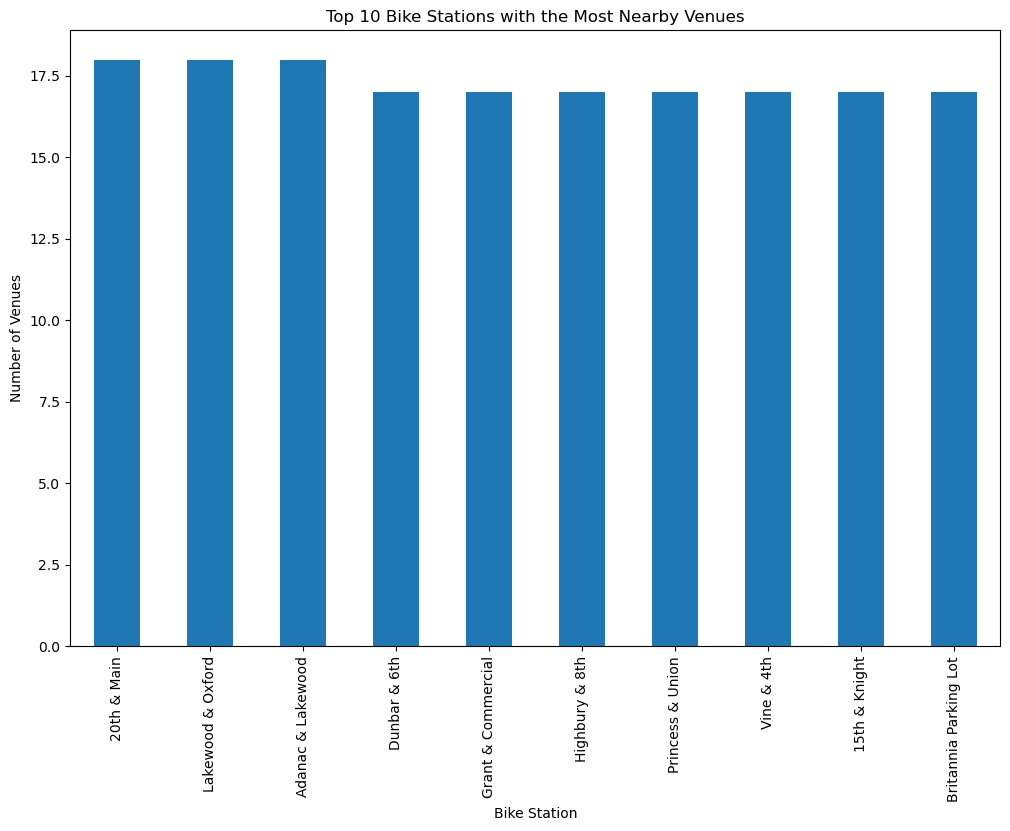

In [16]:
#Counting the number of venues per station
venues_per_station = bikes_venues_df.groupby("station_name").size().sort_values(ascending = False)

# Plotting the top 10 stations with the most venues
plt.figure(figsize = (12, 8))
venues_per_station.head(10).plot(kind = "bar")
plt.xlabel("Bike Station")
plt.ylabel("Number of Venues")
plt.title("Top 10 Bike Stations with the Most Nearby Venues")
plt.show()

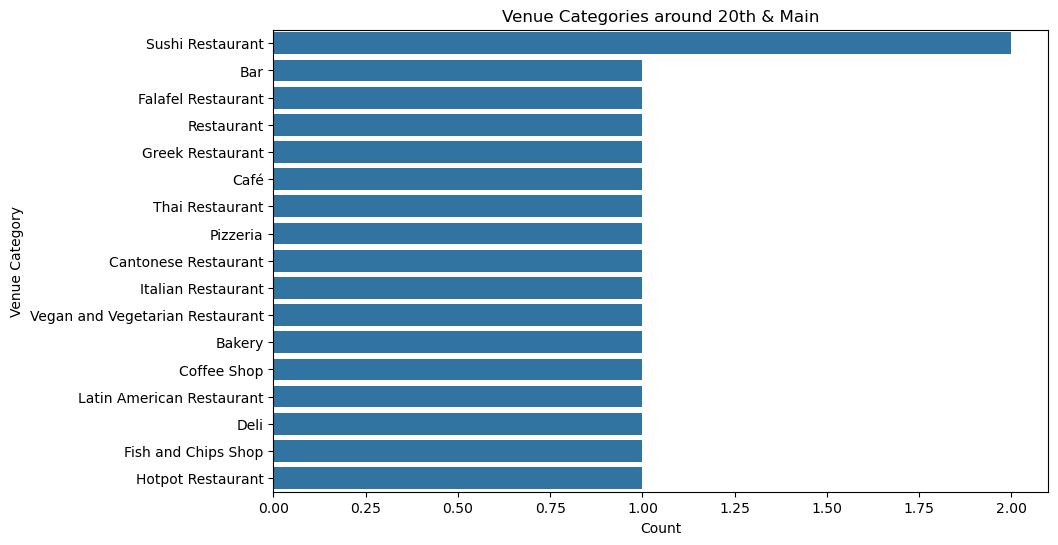

In [17]:
station_name = "20th & Main"
station_venues = bikes_venues_df[bikes_venues_df["station_name"] == station_name]

# Plotting the venue categories
plt.figure(figsize = (10, 6))
sns.countplot(y = station_venues["category_name_fsq"], order = station_venues["category_name_fsq"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Venue Category")
plt.title(f"Venue Categories around {station_name}")
plt.show()

In [18]:
print(bikes_venues_df["category_name_fsq"].dtype)

object


In [19]:
#Let's clean category_name column. I will order the categories into a few, more general categories.
print(bikes_venues_df["category_name_fsq"].unique())

['Café' 'Ramen Restaurant' 'Lounge' 'Diner' 'Sushi Restaurant'
 'Burger Joint' 'Fried Chicken Joint' 'Vegan and Vegetarian Restaurant'
 'Bakery' 'Taco Restaurant' 'Mediterranean Restaurant' 'French Restaurant'
 'Belgian Restaurant' 'Coffee Shop' 'Beer Bar' 'Restaurant'
 'Cambodian Restaurant' 'Steakhouse' 'Vietnamese Restaurant'
 'Malay Restaurant' 'Deli' 'Hotel Bar' 'Brewery' 'Italian Restaurant'
 'Mexican Restaurant' 'American Restaurant' 'Breakfast Spot'
 'Seafood Restaurant' 'Bar' 'Sports Bar' 'Lebanese Restaurant'
 'Hot Dog Joint' 'Dessert Shop' 'New American Restaurant'
 'Japanese Restaurant' 'Night Club' 'Australian Restaurant'
 'Chinese Restaurant' 'Arts and Entertainment' 'Pizzeria'
 'Fast Food Restaurant' 'Dining and Drinking' 'Himalayan Restaurant' 'Pub'
 'BBQ Joint' 'Bagel Shop' 'Bistro' 'Thai Restaurant' 'Indian Restaurant'
 'Burrito Restaurant' 'Tapas Restaurant' 'Shanghai Restaurant'
 'Korean Restaurant' 'Middle Eastern Restaurant' 'Asian Restaurant'
 'Persian Restaurant

In [20]:
bikes_venues_df["category_name_fsq"] = bikes_venues_df["category_name_fsq"].str.strip()
bikes_venues_df["category_name_fsq"] = bikes_venues_df["category_name_fsq"].str.lower()

In [21]:
bikes_venues_df["category_name_fsq"] = bikes_venues_df["category_name_fsq"].replace(r".*(restaurant|steakhouse|diner|pizzeria|bistro|bbq join|fish and chips shop|breakfast spot|dining and drinking|burger joint|fried chicken joint|deli|deli|hot dog joint|sandwich spot|bagel shop|lounge).*", "restaurant", regex=True)
bikes_venues_df["category_name_fsq"] = bikes_venues_df["category_name_fsq"].replace(r".*(bar|brewery|pub|night club).*", "pub", regex=True)
bikes_venues_df["category_name_fsq"] = bikes_venues_df["category_name_fsq"].replace(r".*(coffee|dessert shop|bakery).*", "café", regex=True)

In [22]:
print(bikes_venues_df["category_name_fsq"].unique())

['café' 'restaurant' 'pub' 'arts and entertainment']


In [23]:
print(bikes_venues_df["category_name_fsq"].value_counts())

category_name_fsq
restaurant                2248
café                       308
pub                        220
arts and entertainment      23
Name: count, dtype: int64


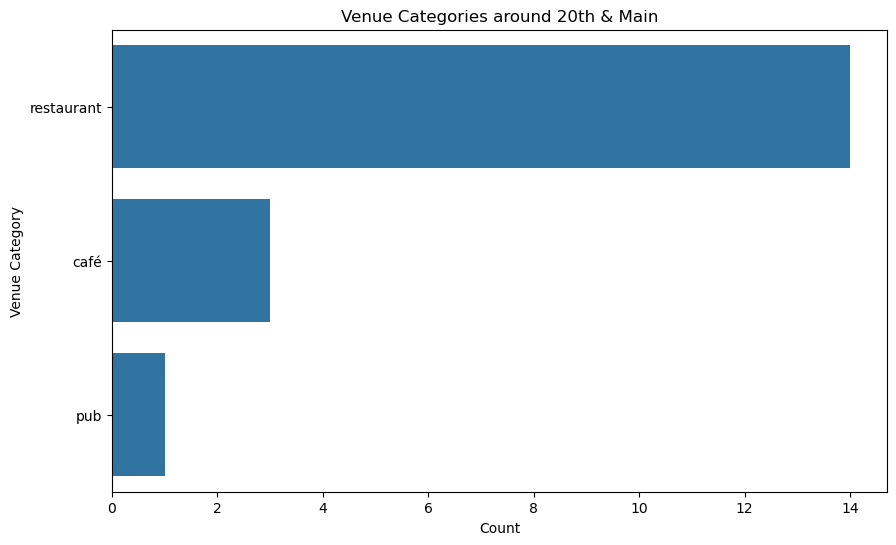

In [24]:
#I will plot again venue categories for a station "20th and Main" to see how it will look like after cleaning the category column 
station_name = "20th & Main"
station_venues = bikes_venues_df[bikes_venues_df["station_name"] == station_name]

# Plotting the venue categories
plt.figure(figsize = (10, 6))
sns.countplot(y = station_venues["category_name_fsq"], order = station_venues["category_name_fsq"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Venue Category")
plt.title(f'Venue Categories around {station_name}')
plt.show()

In [25]:
bikes_venues_df.describe()

,distance_station_fsq,rating_yelp,free_bikes,empty_slots
count,2799.000000,2799.000000,2799.000000,2799.000000
mean,560.631654,3.928224,7.319400,10.565559
std,264.465222,0.422233,5.349289,5.837376
min,12.000000,1.400000,0.000000,0.000000
25%,346.500000,3.700000,3.000000,7.000000
50%,565.000000,4.000000,6.000000,10.000000
75%,789.000000,4.200000,10.000000,14.000000
max,1194.000000,5.000000,27.000000,32.000000


In [26]:
bikes_venues_df.dtypes

distance_station_fsq      int64
name                     object
category_name_fsq        object
rating_yelp             float64
free_bikes                int64
empty_slots               int64
station_name             object
dtype: object

array([[<Axes: title={'center': 'distance_station_fsq'}>,
        <Axes: title={'center': 'rating_yelp'}>],
       [<Axes: title={'center': 'free_bikes'}>,
        <Axes: title={'center': 'empty_slots'}>]], dtype=object)

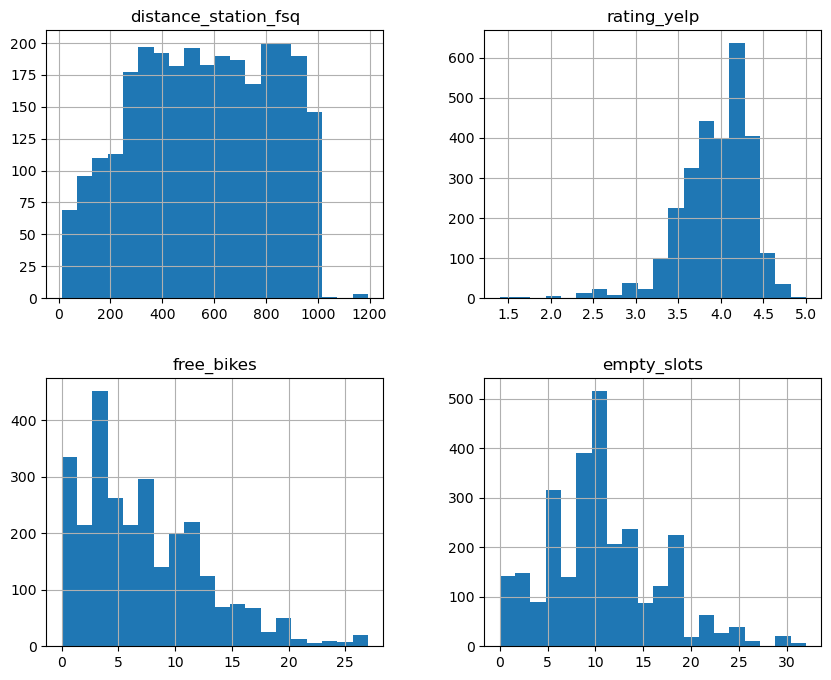

In [27]:
#To see the distribution I will plot histograms for distance to the station, rating, free bikes and empty slots
bikes_venues_df.hist(column = ["distance_station_fsq", "rating_yelp", "free_bikes", "empty_slots"], bins = 20, figsize = (10, 8))

The visualization above shows the distribution of the data. For top histograms we can observe number of venues that fall within each distance range, and with each rating. For the bottom we can see how many free bikes are located at nearby stations for each venue and accordingly, how many empty slots is per each station.



<Axes: >

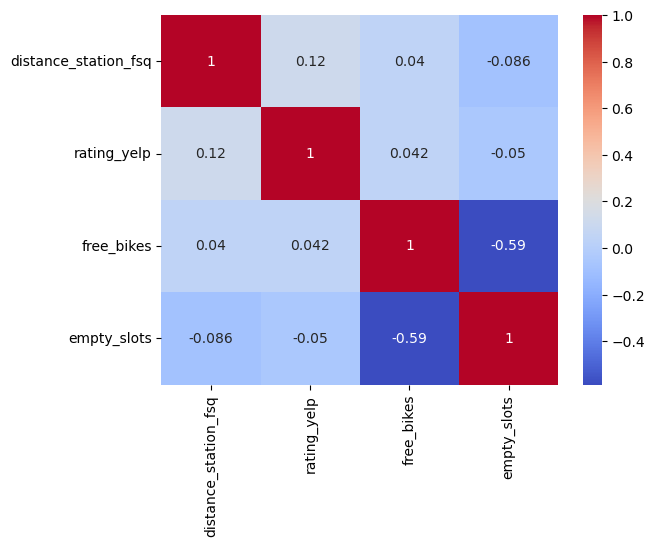

In [28]:
#Checking the correlation between distance to the station, rating, free bikes and empty slots to understand their relationships.
bikes_numeric_df = bikes_venues_df.select_dtypes(include = ["float64", "int64"])

correlation_matrix = bikes_numeric_df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")

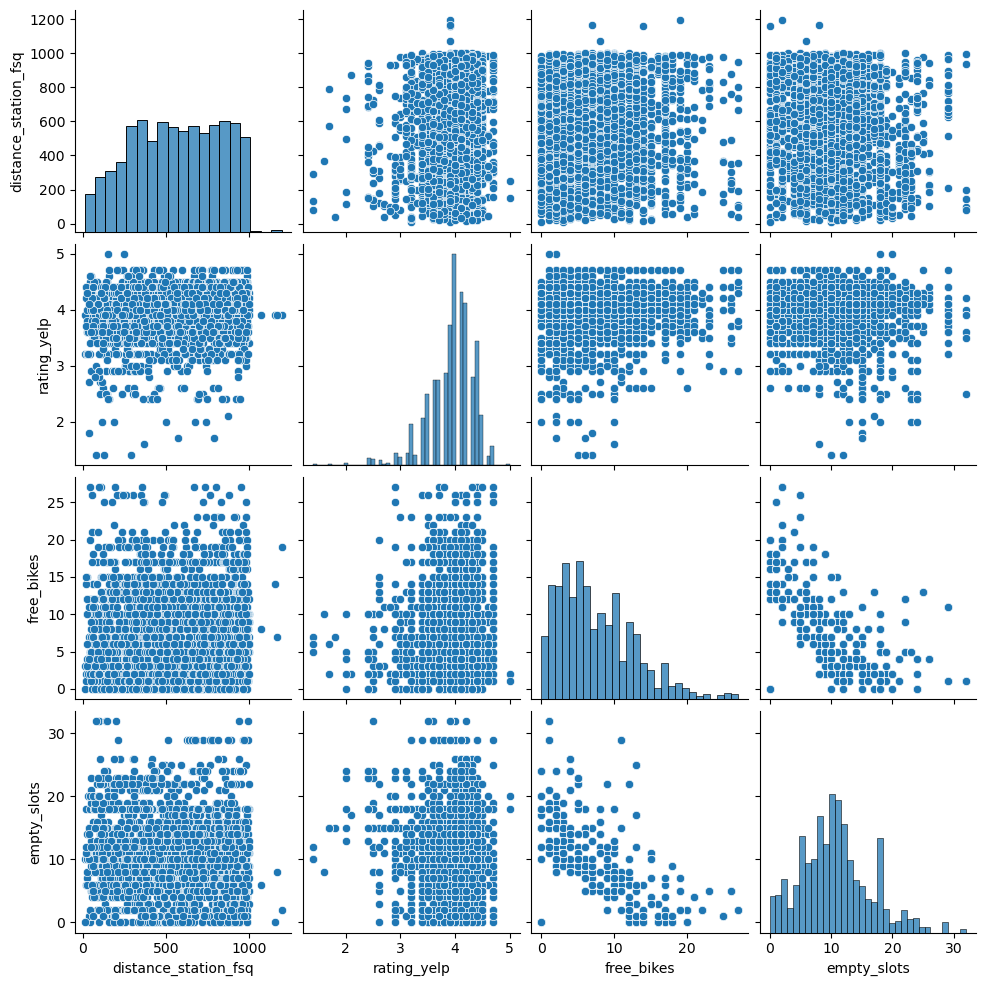

In [29]:
#Visualizing the pairwise relationships between distance to the station, rating, free bikes and empty slots.
sns.pairplot(bikes_venues_df[["distance_station_fsq", "rating_yelp", "free_bikes", "empty_slots"]])

From the plots above for distance_station, rating, free_bike and empty_slots we can observe little or no correlation between variables. Only free bikes and empty slots are showing moderate negative correlation, which means that if the number of free bikes increases the number of empty slots tends to decrease. 

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [30]:
#Creating a function to connect to the sql lite database
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [31]:
connection = create_connection(r"D:\LHL\projects\lhl-statistical-modelling-with-python\data\van_bikes.db")

Connection to SQLite DB successful


Creating Tables

In [32]:
#Creating a function to execute queries
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [33]:
#Creating vancouver_bikes table for the database
create_vancouver_bikes_table = """
CREATE TABLE IF NOT EXISTS vancouver_bikes (
city_bikes_id integer PRIMARY KEY NOT NULL,
latitude float NOT NULL,
longitude float NOT NULL,
free_bikes integer,
empty_slots integer,
station_name string
);
"""

In [34]:
execute_query(connection, create_vancouver_bikes_table)

Query executed successfully


In [35]:
#Creating vancouver_venues_fsq table for the database
create_vancouver_venues_fsq_table = """
CREATE TABLE IF NOT EXISTS vancouver_venues_fsq (
fsq_id integer PRIMARY KEY NOT NULL,
distance_station integer,
latitude float NOT NULL,
longitude float NOT NULL,
name string,
category_name string,
rating float,
city_bikes_id integer
);
"""

In [36]:
execute_query(connection, create_vancouver_venues_fsq_table)

Query executed successfully


In [37]:
#Creating vancouver_venues_yelp table for the database
create_vancouver_venues_yelp_table = """
CREATE TABLE IF NOT EXISTS vancouver_venues_yelp (
yelp_id integer PRIMARY KEY NOT NULL,
name string,
rating float,
category_name string,
distance_station float,
latitude float NOT NULL,
longitude float NOT NULL,
city_bikes_id integer,
category string
);
"""

In [38]:
execute_query(connection, create_vancouver_venues_yelp_table)

Query executed successfully


Inserting data into tables with to.sql()

In [39]:
van_bikes.to_sql("vancouver_bikes", connection, if_exists = "replace", index = False)

254

In [40]:
venues_fsq.to_sql("vancouver_venues_fsq", connection, if_exists = "replace", index = False)

11951

In [41]:
venues_yelp.to_sql("vancouver_venues_yelp", connection, if_exists = "replace", index = False)

12425

In [42]:
#Creating a function to read tables from database
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [43]:
test_vb = "SELECT * FROM vancouver_bikes LIMIT 1 "
bikes_test = execute_read_query(connection, test_vb)

for i in bikes_test:
    print(i)

(1, 49.262487, -123.114397, 1, 32, '10th & Cambie')


In [44]:
test_fsq = "SELECT * FROM vancouver_venues_fsq LIMIT 1 "
fsq_test = execute_read_query(connection, test_fsq)

for i in fsq_test:
    print(i)

('4aec909ff964a520ccc821e3', 435, 49.263724, -123.108701, 'Milano Coffee', 'Coffee Shop', None, 1)


In [45]:
test_yelp = "SELECT * FROM vancouver_venues_yelp LIMIT 1 "
yelp_test = execute_read_query(connection, test_yelp)

for i in yelp_test:
    print(i)

('XAH2HpuUUtu7CUO26pbs4w', 'Saku', 4.3, "[{'alias': 'japanese', 'title': 'Japanese'}]", 178.8453436692719, 49.2631006, -123.11667523250104, 1, 'japanese')
